# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings('ignore')

In [22]:
ronde_dataset = pd.read_csv('../../data/complete_dataset_no_outliers.csv').drop(columns=['profile', 'uci_points', 'mean_cyclist_cp', 'mean_delta', 'mean_position', 'raw_position', 'points'])
ronde_dataset = ronde_dataset[ronde_dataset['race_name'] == 'Ronde van Vlaanderen']
ronde_dataset = ronde_dataset.select_dtypes(include=['number'])
ronde_dataset = ronde_dataset.dropna().reset_index(drop=True)

# drop colums from PCA and UMAP analisis
ronde_dataset = ronde_dataset.drop(['length', 'startlist_quality', 'position', 'delta', 'race_year', 'race_prestige', 'num_participants', 'cyclist_climb_power', 'previous_mean_cp'], axis=1)

ronde_dataset.info()
columns_to_use = ronde_dataset.columns

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(ronde_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   birth_year                   762 non-null    int64  
 1   weight                       762 non-null    float64
 2   height                       762 non-null    float64
 3   climb_total                  762 non-null    float64
 4   cyclist_age                  762 non-null    int64  
 5   cyclist_bmi                  762 non-null    float64
 6   climb_percentage             762 non-null    float64
 7   race_physical_effort         762 non-null    float64
 8   previous_mean_position       762 non-null    float64
 9   previous_mean_delta          762 non-null    float64
 10  cyclist_previous_experience  762 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 65.6 KB


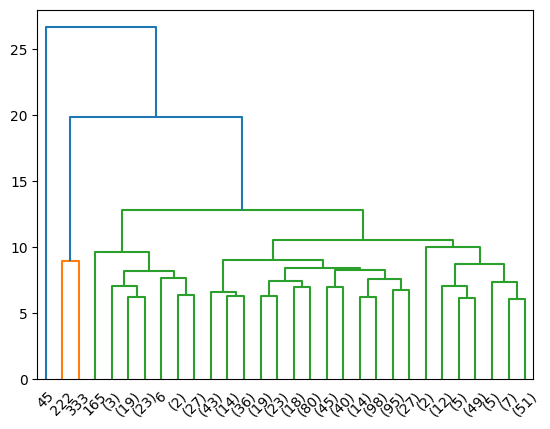

In [4]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [6]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.700833140271853)

In [7]:
cluster_labels = fcluster(data_link, t=8.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.0692111584899827)

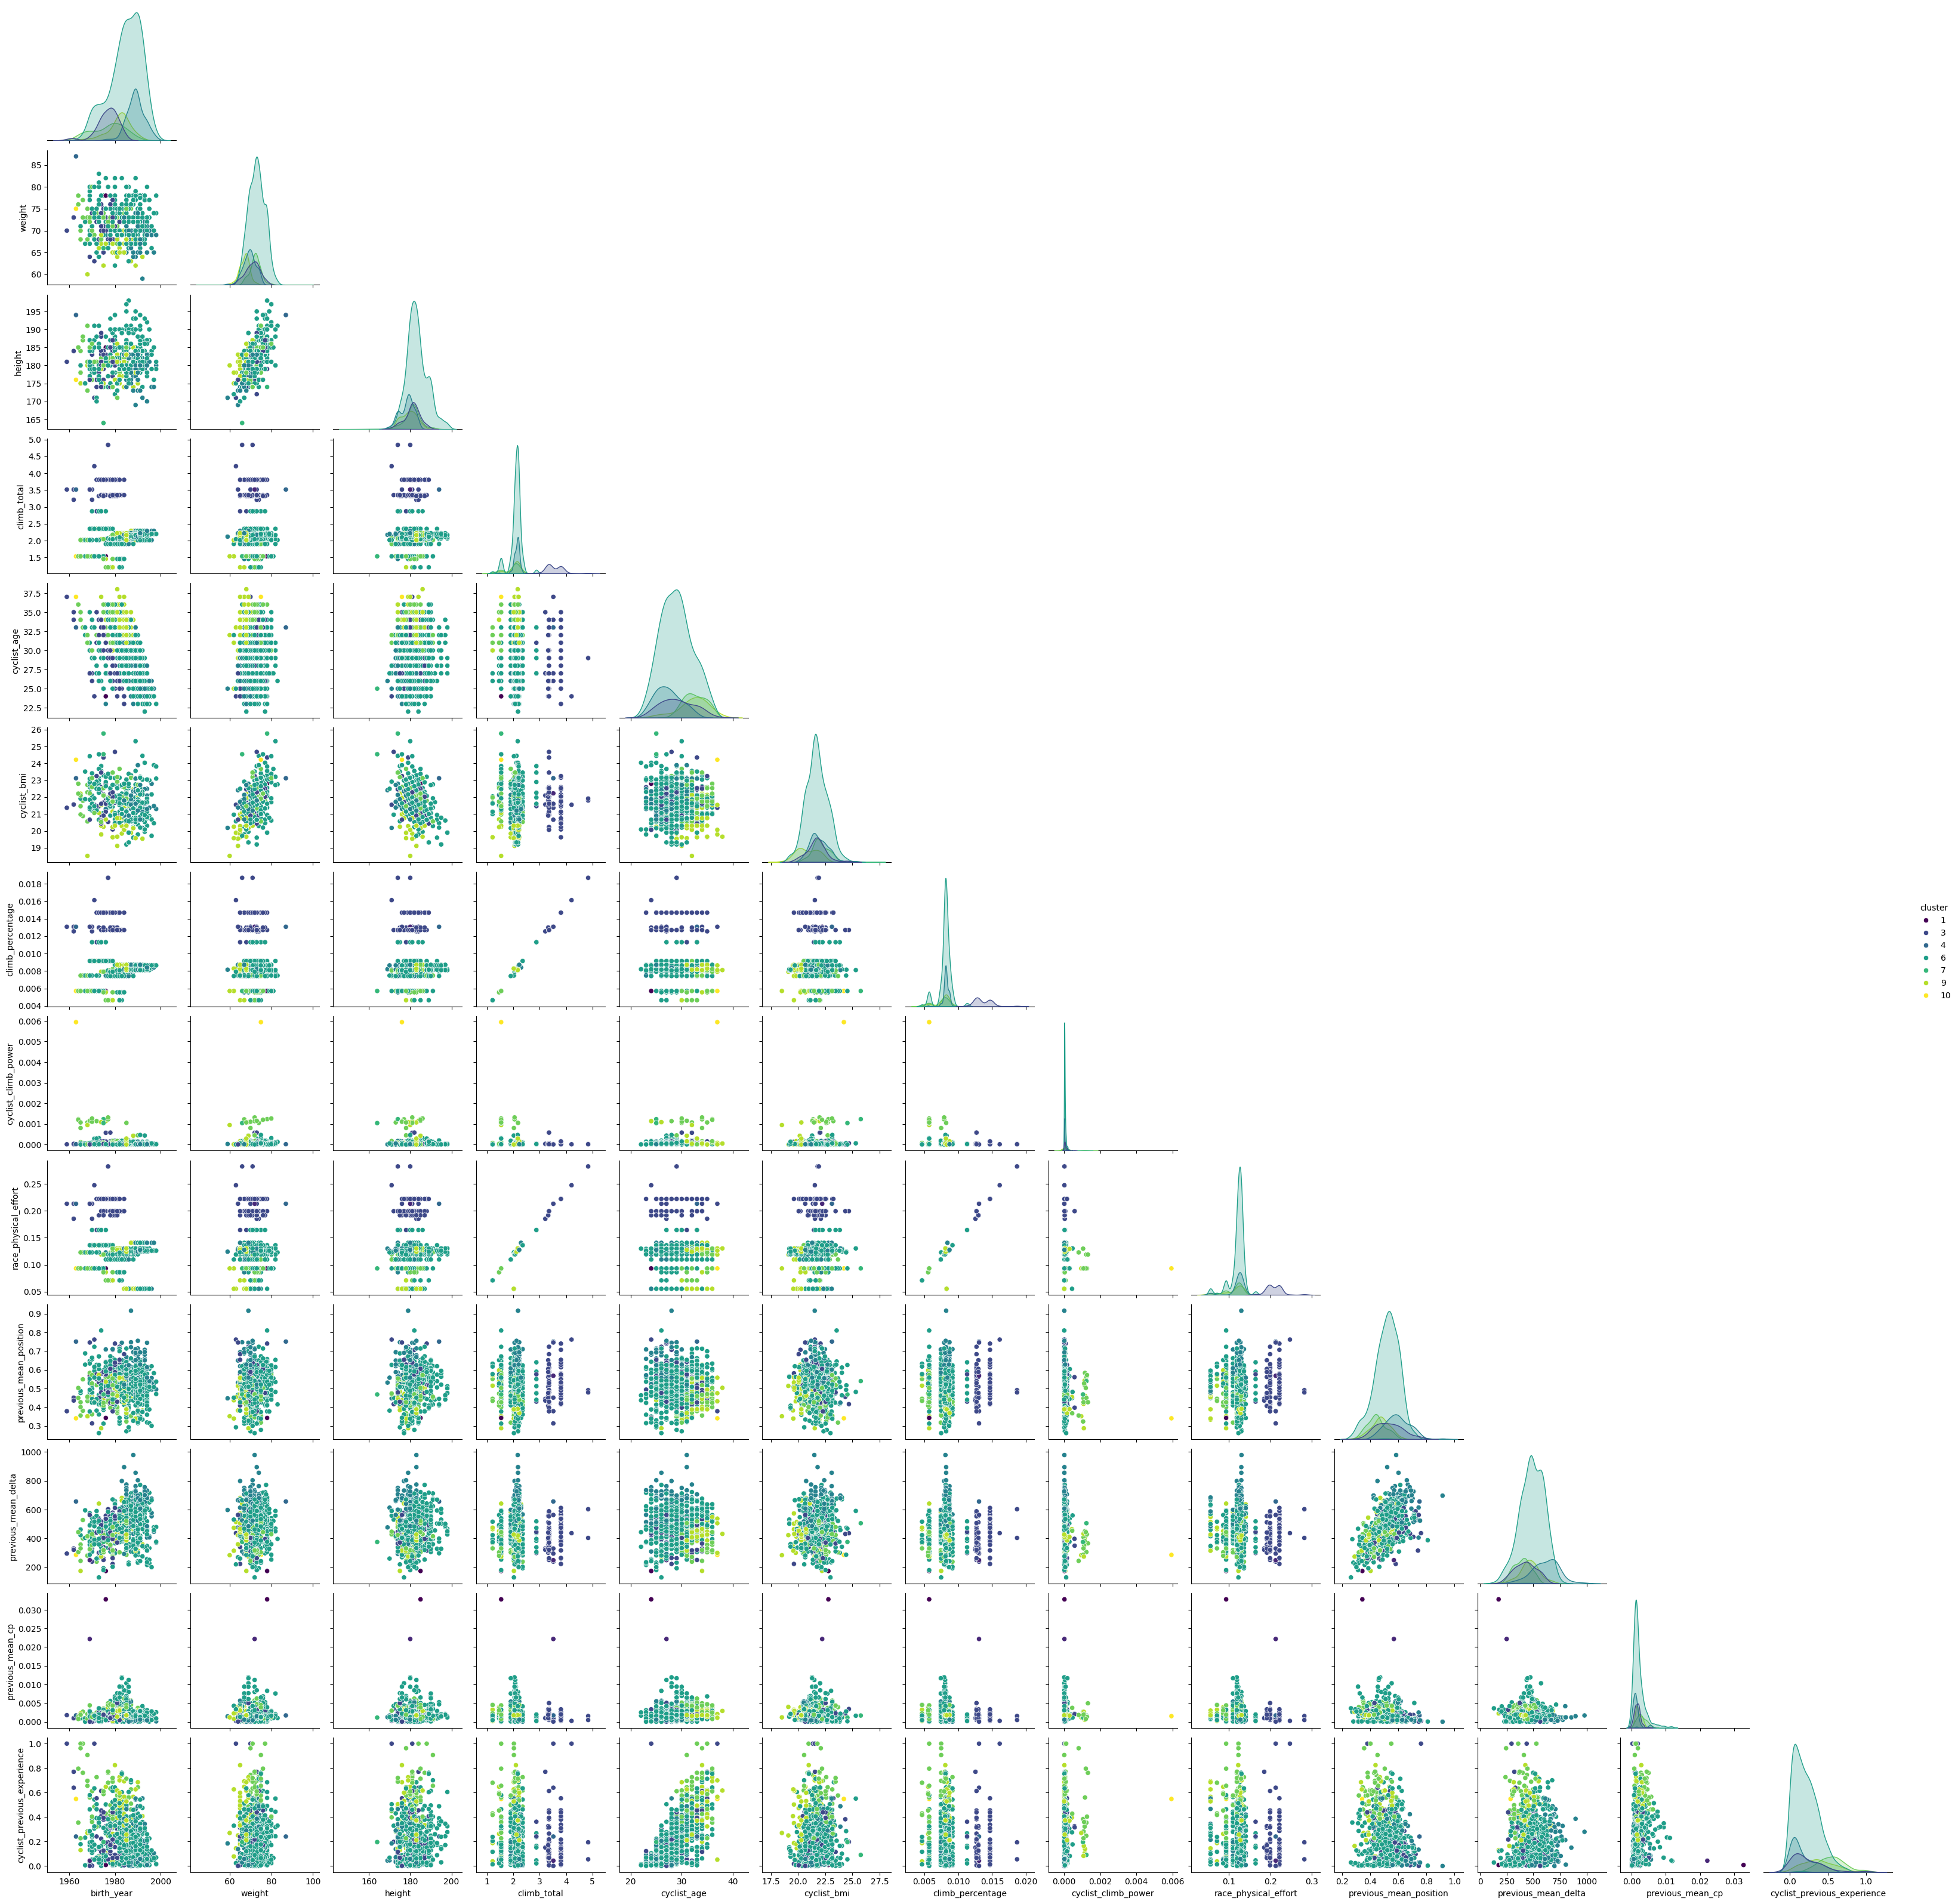

In [8]:
ronde_dataset['cluster'] = cluster_labels
sns.pairplot(ronde_dataset, hue='cluster', palette='viridis', corner=True)

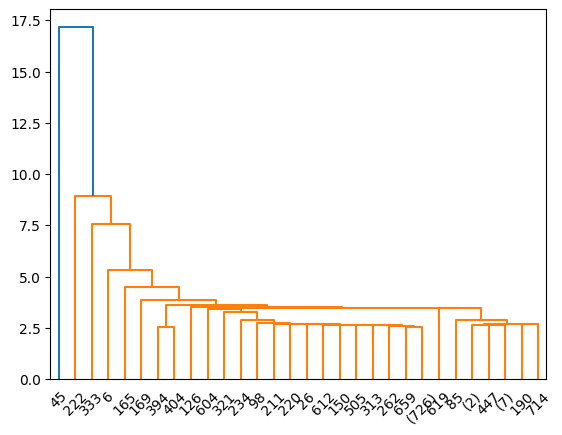

In [9]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [10]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.7545712579952899)

In [11]:
cluster_labels = fcluster(data_link, t=3.2, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.21833292653739417)

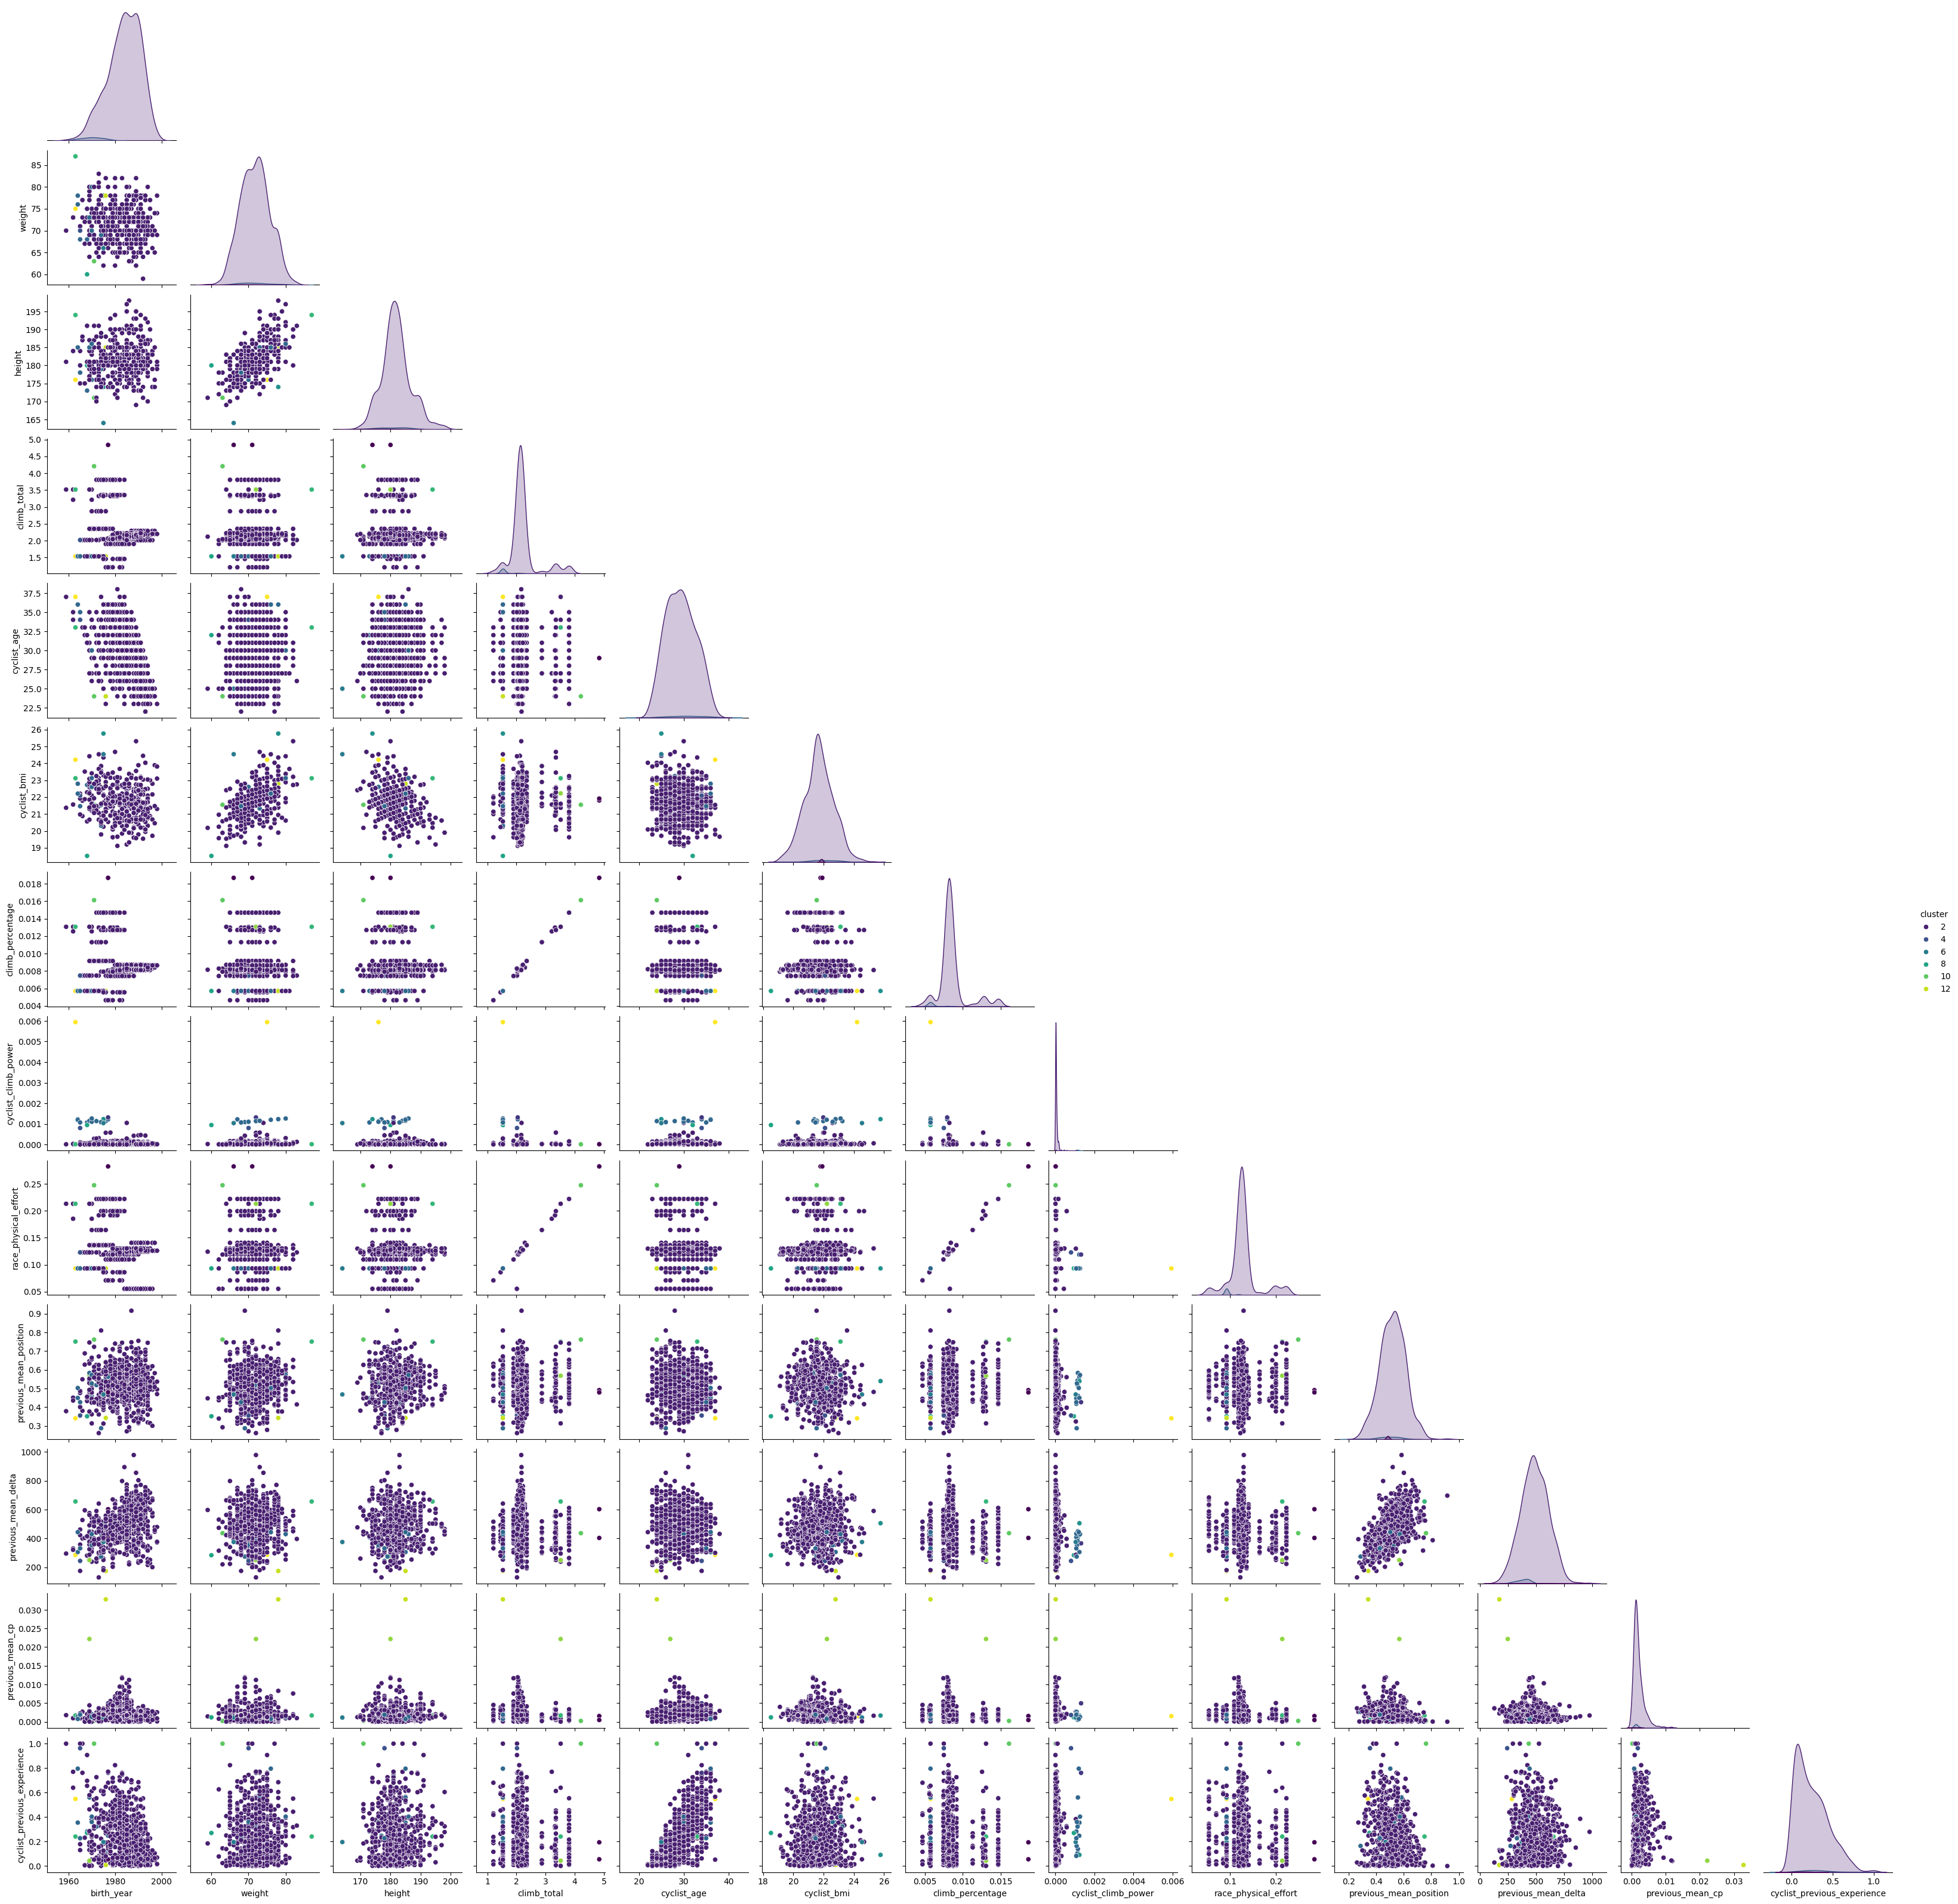

In [12]:
ronde_dataset['cluster'] = cluster_labels
sns.pairplot(ronde_dataset, hue='cluster', palette='viridis', corner=True)

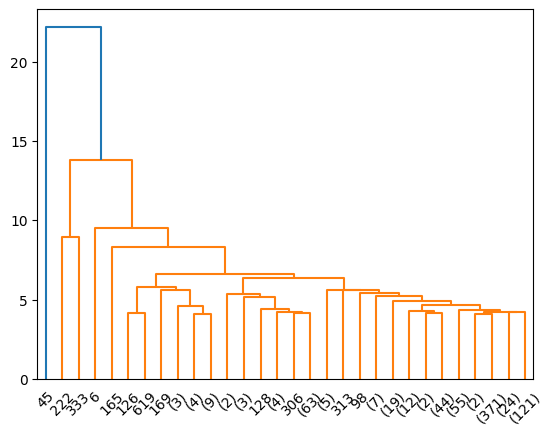

In [13]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [14]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.8432354854441056)

In [15]:
cluster_labels = fcluster(data_link, t=5.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.18407040373093025)

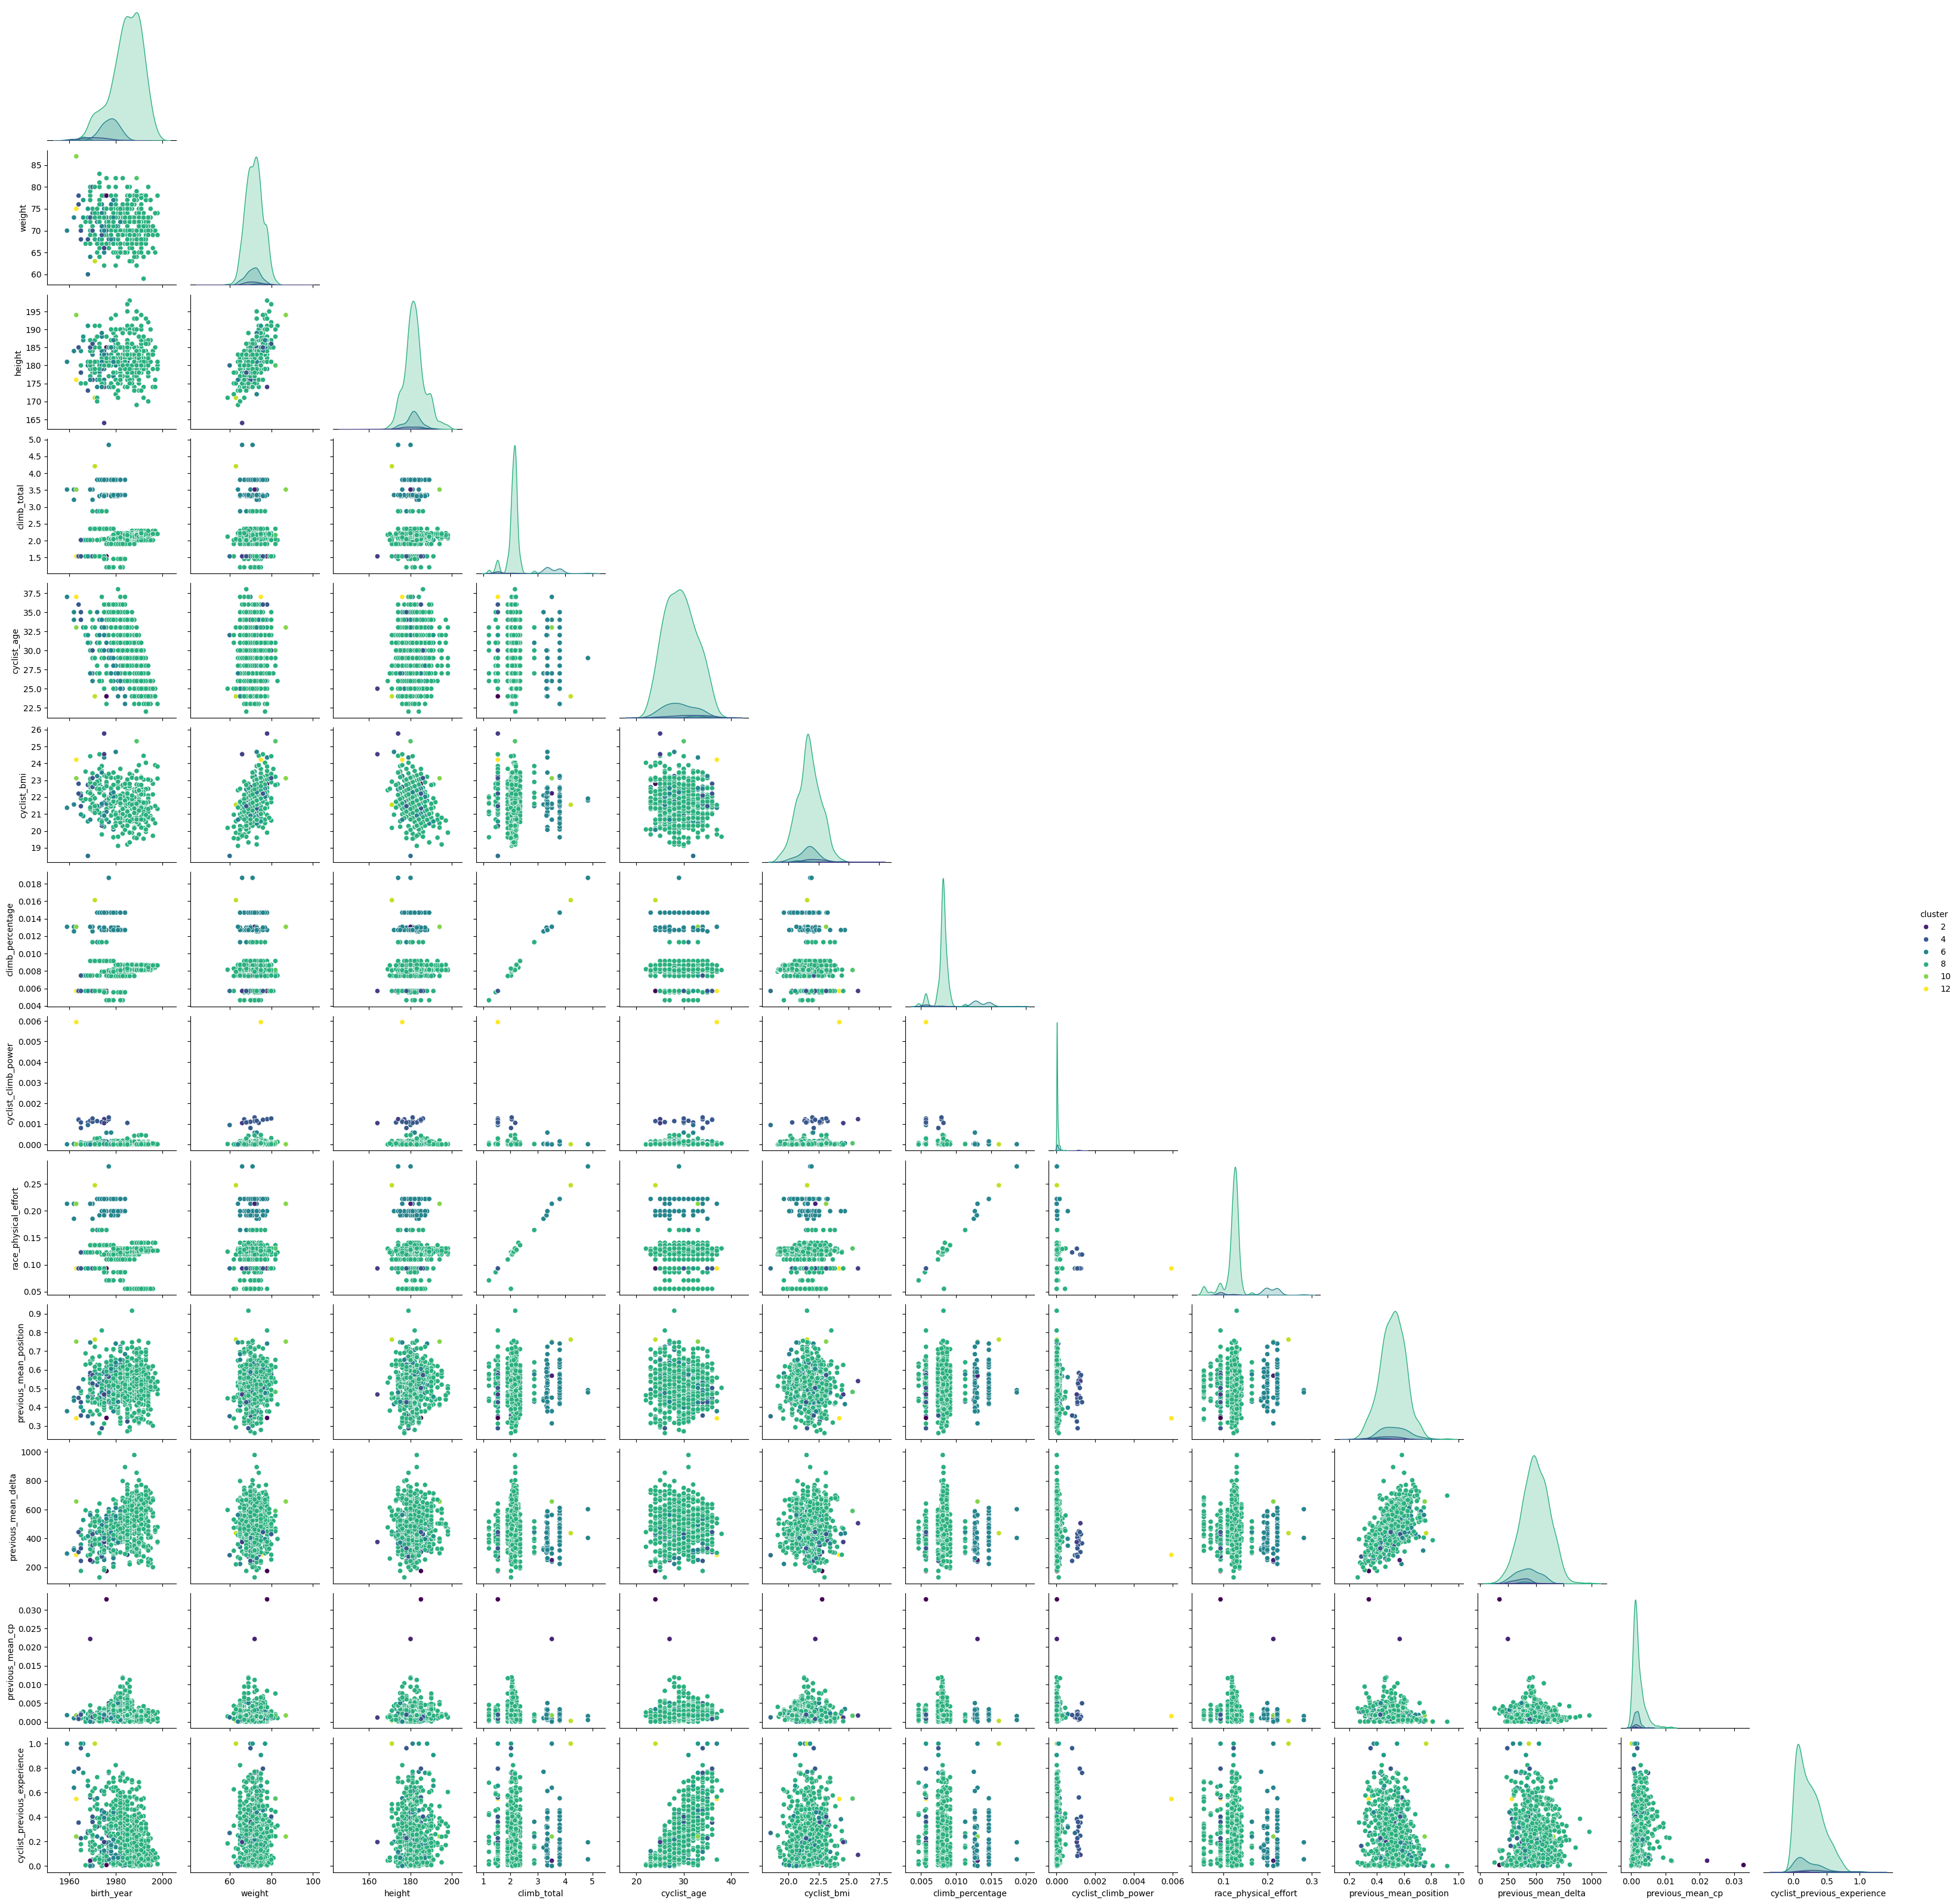

In [16]:
ronde_dataset['cluster'] = cluster_labels
sns.pairplot(ronde_dataset, hue='cluster', palette='viridis', corner=True)

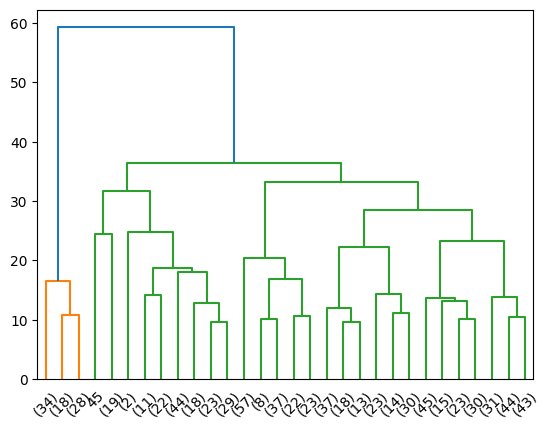

In [17]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [18]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.5064310864533569)

In [19]:
cluster_labels = fcluster(data_link, t=75, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

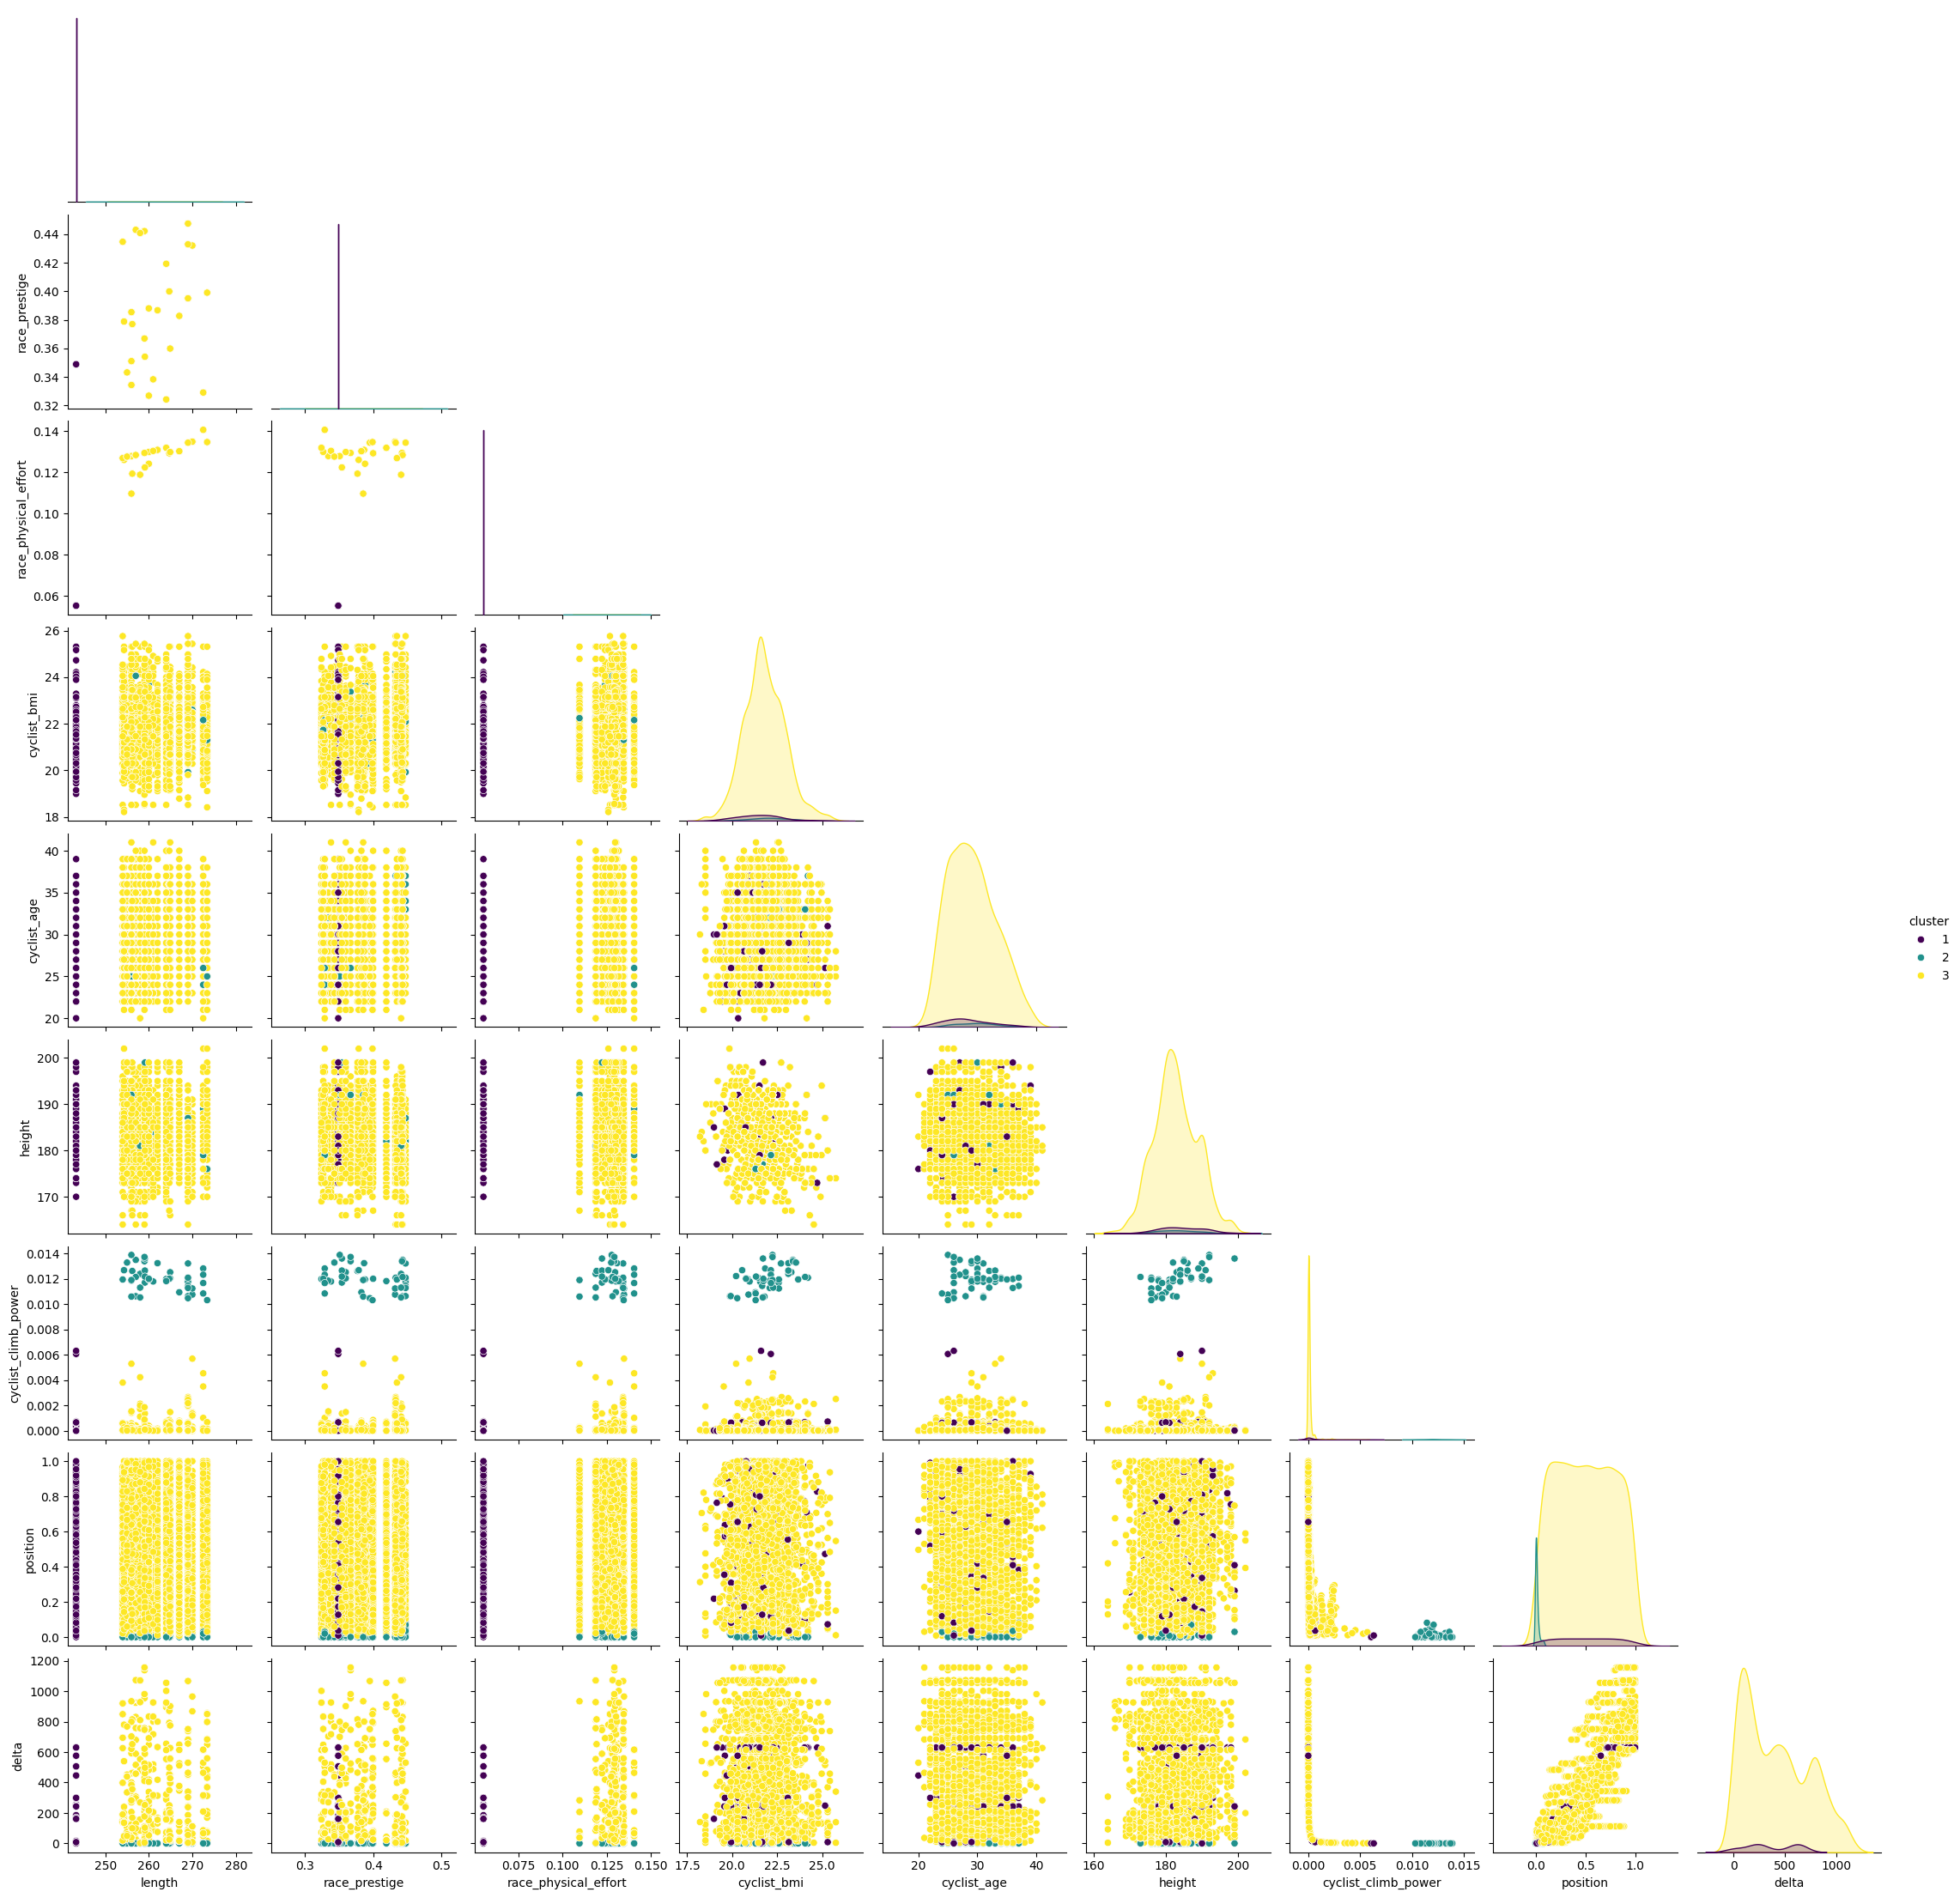

In [76]:
ronde_dataset['cluster'] = cluster_labels
sns.pairplot(ronde_dataset, hue='cluster', palette='viridis', corner=True)